## Predicting the chronic kidney disease using machine learning

### Overview

In this article we will be going through Chronic kidney disease dataset and do the complete analysis on the same our main goal will be to predict that whether an individual will have the chronic kidney disease or not based on the data provided.

### Takeaways from the blog

1. Data preprocessing
2. Exploratory data analysis
3. Model building
4. Saving the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns
import missingno as msno

%matplotlib inline

In [2]:
df = pd.read_csv('kidney.csv')
data = df
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 25)

In [4]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [6]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [7]:
df.isna().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


### Correlation matrix & Matrix Visualisation

In [9]:
# Let's find out how many of each class are

df['class'].value_counts()
# from below output we ca draw our inference that this is close to "imbalanced dataset"

,count
class,
ckd,250
notckd,150


In [10]:
#Representation of Target variable in Percentage

countNoDisease = len(df[df['class'] == 0])
countHaveDisease = len(df[df['class'] == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df['class']))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df['class']))*100)))

Percentage of Patients Haven't Heart Disease: 0.00%
Percentage of Patients Have Heart Disease: 0.00%


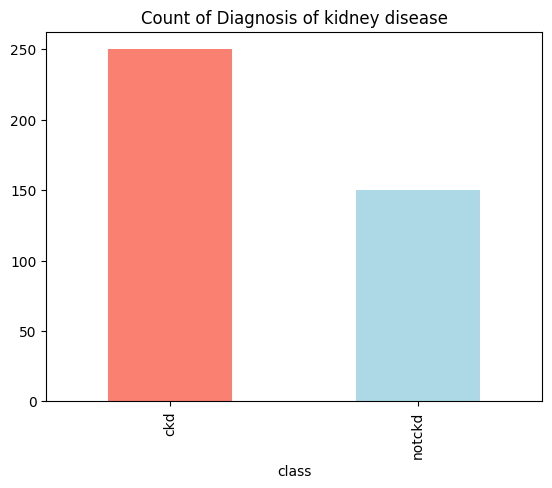

In [11]:
#Understanding the balancing of the data visually

df['class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease");


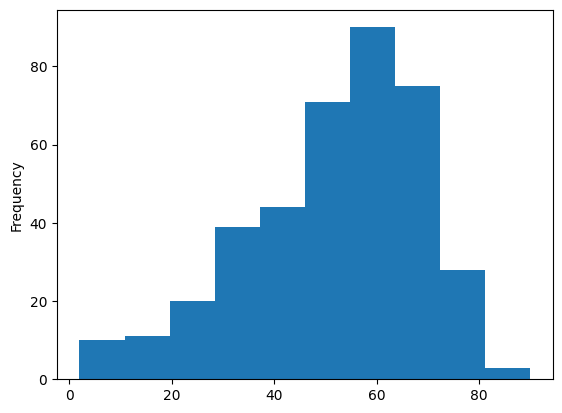

In [12]:
#Check the distribution of the age column with a histogram

df['age'].plot(kind='hist');

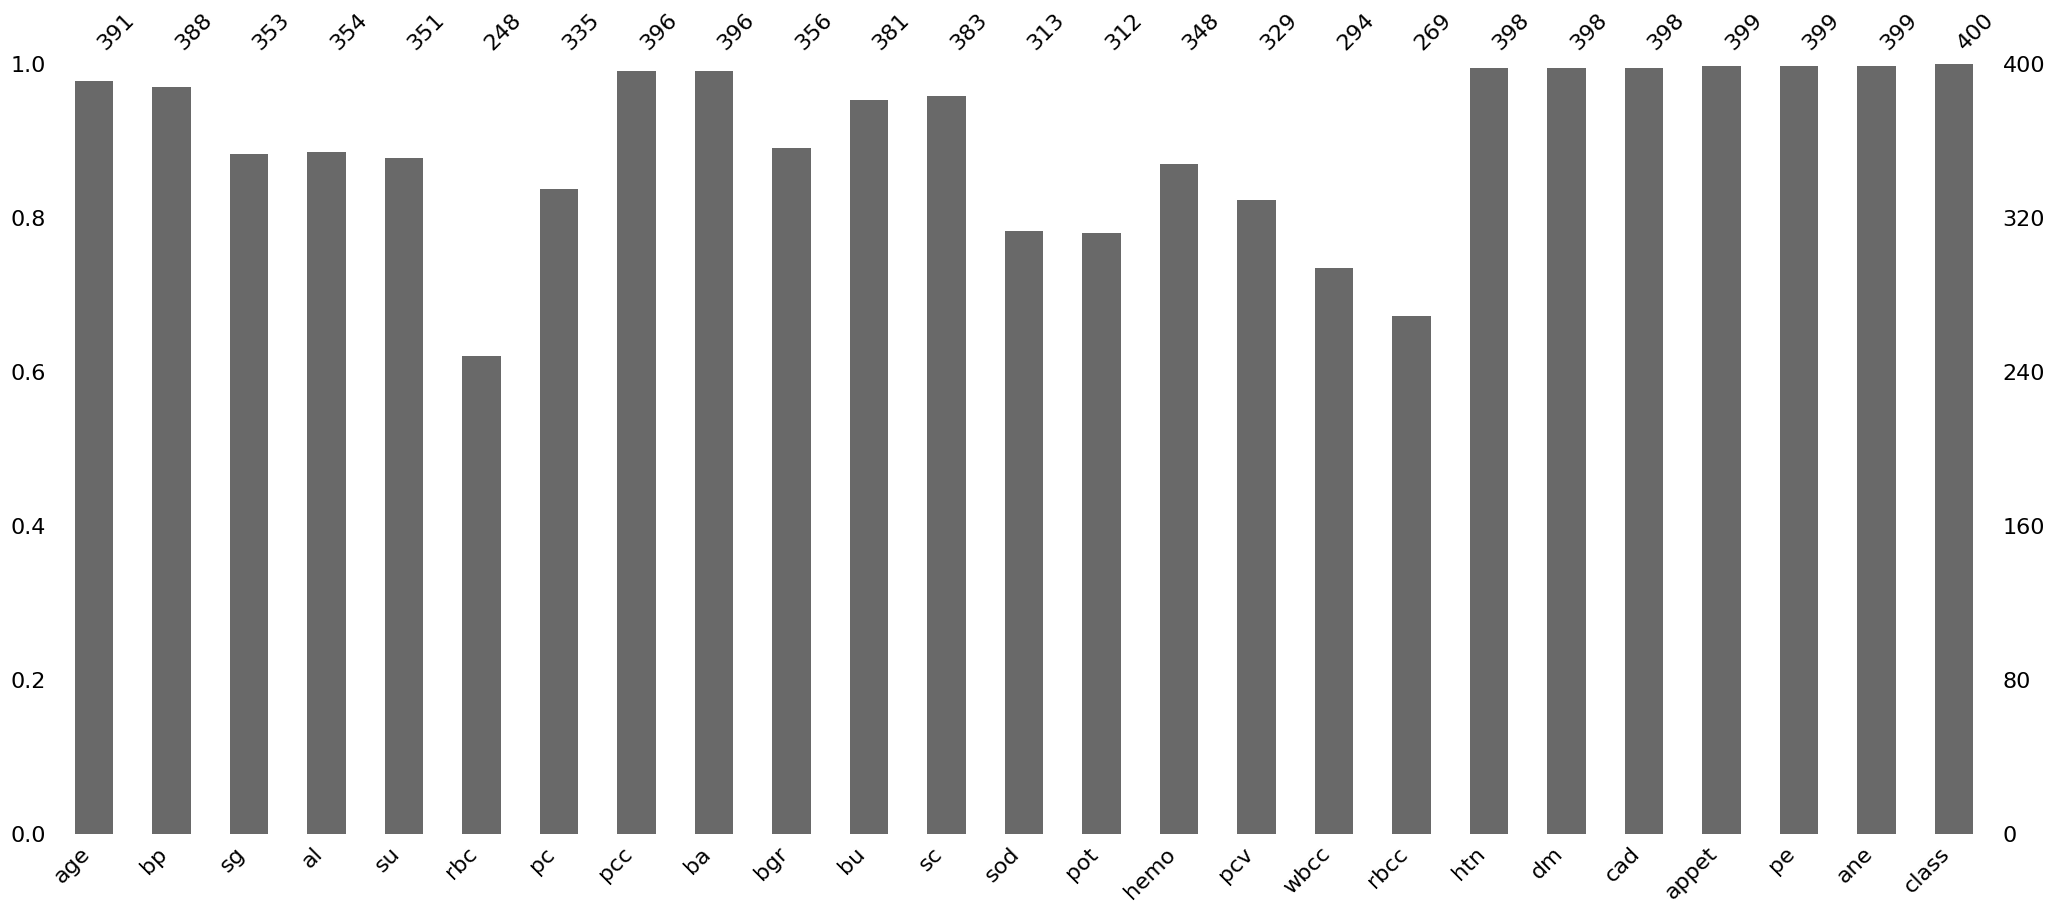

In [13]:
# Here we are plotting the graph to see the null values in the datset
p = msno.bar(data)

Inference: Here any features which ae not touching the 400 mark at the top are having null values.

<ipython-input-14-58b007db67d0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(data['bp'])


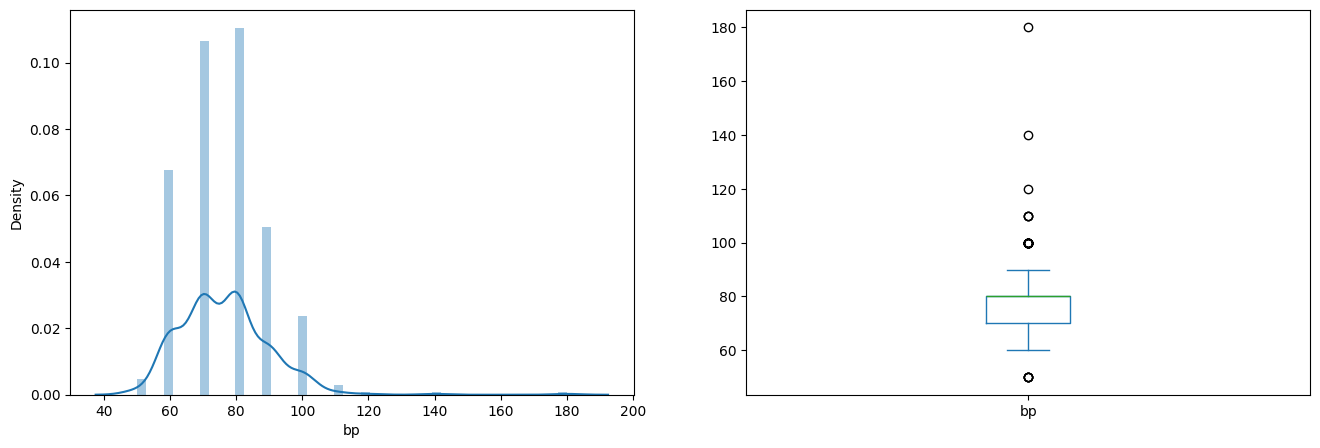

In [14]:
plt.subplot(121), sns.distplot(data['bp'])
plt.subplot(122), data['bp'].plot.box(figsize=(16,5))
plt.show()

Inference: Here in the above graph we can see the distribution of blood pressure and also in the subplot it is visible that bp column has some outliers in it.

In [15]:
data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})

In [16]:
data['class'].value_counts()

,count
class,
1,250
0,150


Here I'm mentioning some reasons which will effect you kidney in a drastically bad way.

- Diabetes - blood sugar or diabetes mellitus
- High blood pressure - BP
- Heart and blood vessel (cardiovascular) disease
- Smoking
- Obesity
- Being African-American, Native American or Asian-American
- Family history of kidney disease
- Abnormal kidney structure
- Older age - age

<Axes: >

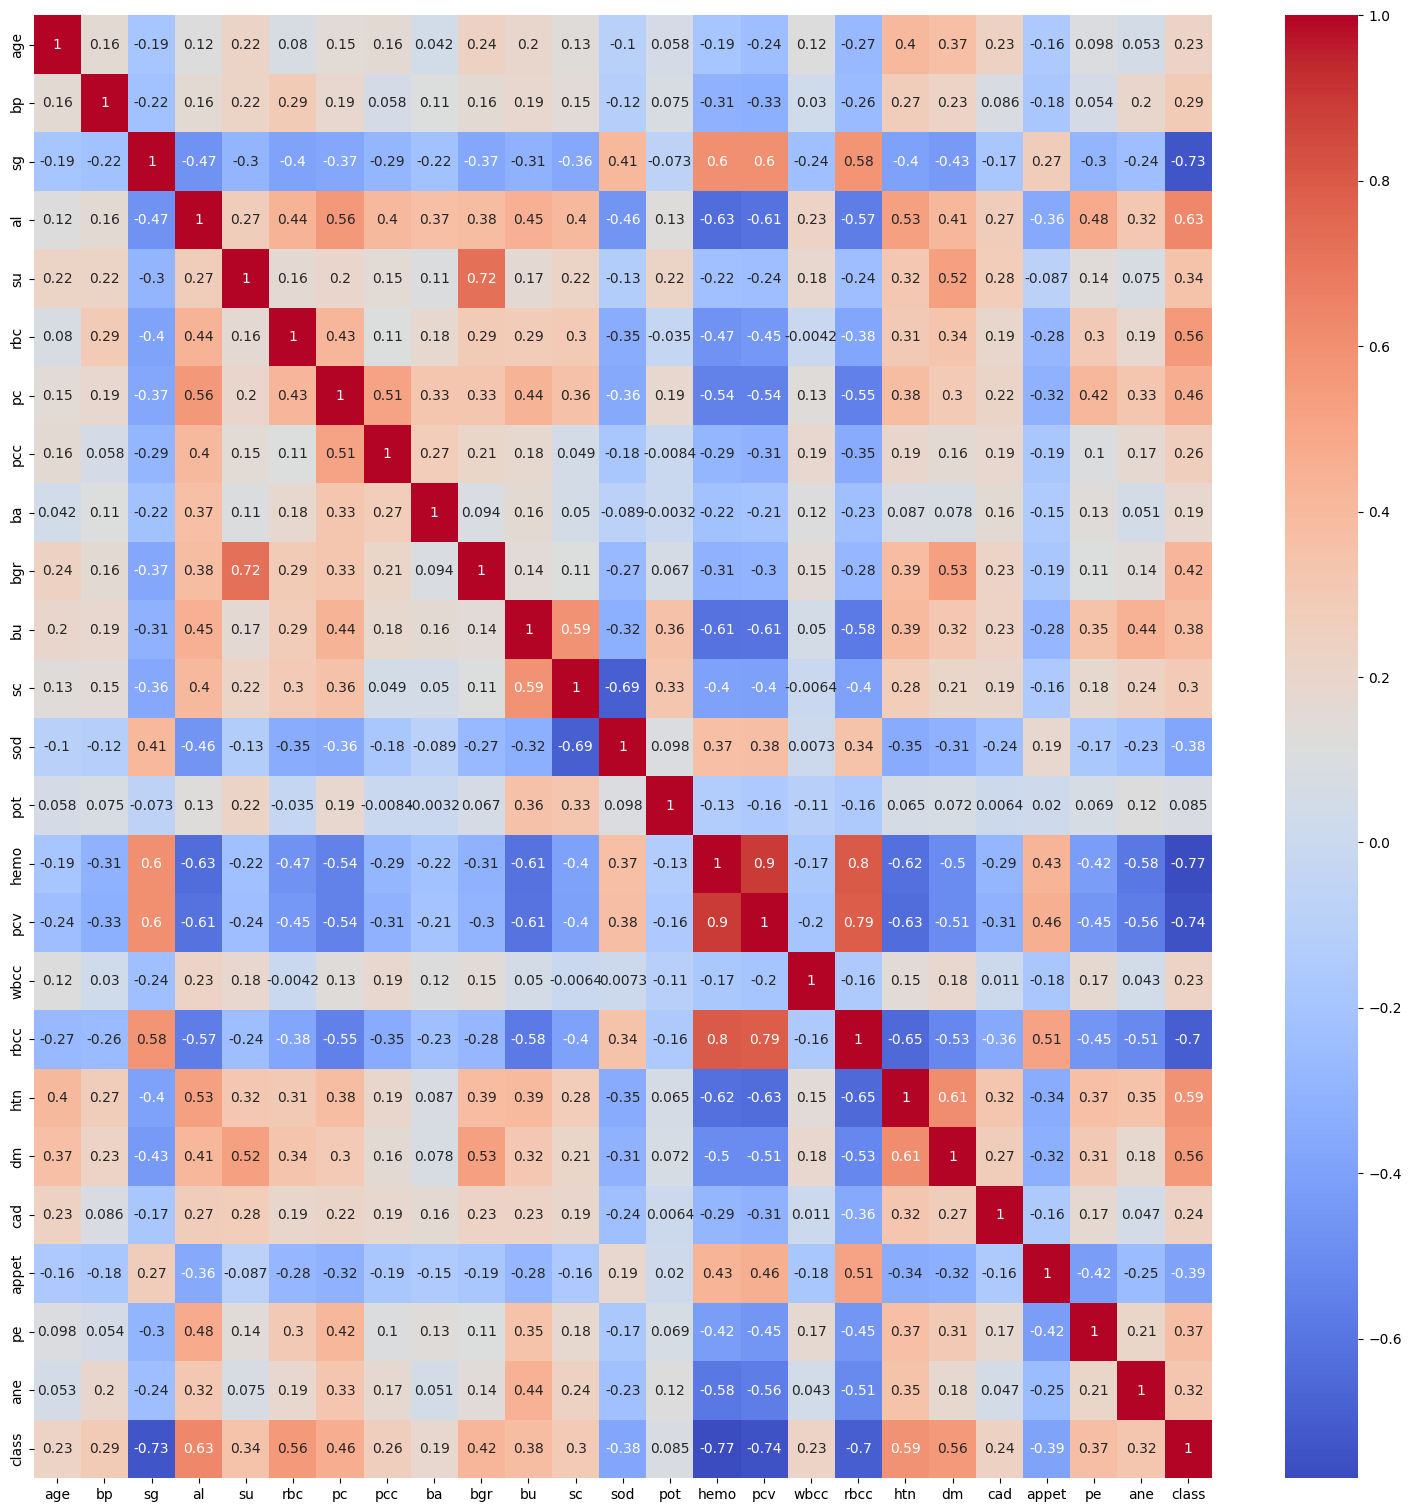

In [17]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row

## EDA

In [18]:
data.shape

(400, 25)

In [19]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [20]:
data.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [21]:
data.shape[0], data.dropna().shape[0]

(400, 158)

Here from the above output we can see that there are 158 null values in the dataset. Now here we are left with two choices that we could either drop all the null values or to keep them, when we will drop those NA valus so we should understand that our dataset is not that large and if we drop those null values then it would be even smaller in that caseif we provide very less data to our machine learnig model then the performance would be very less also we yet don't know that these null values are related to some other features in the dataset.

So for this time I'll keep these values and see how the model will perform in this dataset.

Also when we are working on some healthcare project where we will be predicting that whether the person is suffering about that disease or not then one thing we should keep in my mind that the model evaluation should have the least false postive errors.

In [22]:
data.dropna(inplace=True)

In [23]:
data.shape

(158, 25)

## Modeling

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg = LogisticRegression()

In [26]:
X = data.iloc[:,:-1]
y = data['class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

In [28]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#Training score

logreg.score(X_train,y_train)

1.0

In [30]:
#Testing accuracy

logreg.score(X_test,y_test)

1.0

In [31]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


### The cell below shows the coefficients for each variable.
(example on reading the coefficients from a Logistic Regression: a one unit increase in age makes an individual about e^0.14 time as likely to have ckd, while a one unit increase in blood pressure makes an individual about e^-0.07 times as likely to have ckd.

In [34]:
pd.DataFrame(logreg.coef_, columns=X.columns)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0.261782,-0.115751,0.004076,0.392861,0.027314,0.020185,0.120366,0.003048,0.016588,0.226669,...,-0.29606,-0.890961,0.001059,-0.138153,0.123698,0.123185,0.001753,-0.004726,0.020863,0.002816


### Confusion Matrix

In [35]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    This function will be heloing in plotting the confusion matrix by using seaborn
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


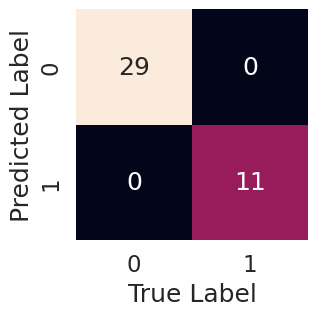

In [36]:
log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


### K-Nearest Neighbors Classifier

It is a good practice to first balance the class well before using the KNN, as we know that in the case of unbalanced classes KNN does'nt performs well.

In [38]:
df["class"].value_counts()

,count
class,
0,115
1,43


In [39]:
balanced_df = pd.concat([df[df["class"] == 0], df[df["class"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)

In [40]:
balanced_df["class"].value_counts()

,count
class,
0,115
1,115


In [41]:
X = balanced_df.drop("class", axis=1)
y = balanced_df["class"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [43]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()
params = {
        "n_neighbors":[3,5,7,9],
        "weights":["uniform","distance"],
        "algorithm":["ball_tree","kd_tree","brute"],
        "leaf_size":[25,30,35],
        "p":[1,2]
    }

gs = GridSearchCV(knn, param_grid=params)

model = gs.fit(X_train,y_train)

preds = model.predict(X_test)

accuracy_score(y_test, preds)

1.0

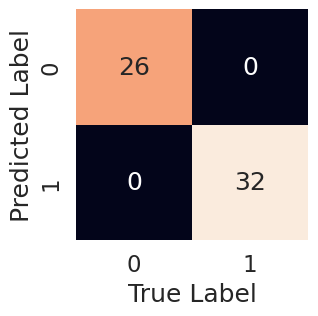

In [46]:
knn_pred = model.predict(X_test)
plot_conf_mat(y_test, knn_pred)

In [47]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 26
False Pos: 0
False Neg: 0
True Pos: 32


### Feature Importance

In [48]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable

feature_dict=dict(zip(df.columns,list(logreg.coef_[0])))
feature_dict

#This is a type of Model driven Exploratory data analysis

{'age': 0.26178207674560006,
 'bp': -0.11575071984527649,
 'sg': 0.004075597399908276,
 'al': 0.39286143395252016,
 'su': 0.027313791106112022,
 'rbc': 0.02018518545067758,
 'pc': 0.1203660489573055,
 'pcc': 0.003048297021247176,
 'ba': 0.01658784367904037,
 'bgr': 0.22666867700830157,
 'bu': 0.21349721387984175,
 'sc': 0.18433678880604706,
 'sod': -0.11004023547755791,
 'pot': 0.03591683498689088,
 'hemo': -0.29606037772169624,
 'pcv': -0.890960651224977,
 'wbcc': 0.0010585456879384733,
 'rbcc': -0.1381525257736391,
 'htn': 0.12369775351024494,
 'dm': 0.12318464075116585,
 'cad': 0.001753331207375438,
 'appet': -0.004725642889839999,
 'pe': 0.020862735839792538,
 'ane': 0.0028157757749042523}

<Axes: title={'center': 'Feature Importance'}, ylabel='Frequency'>

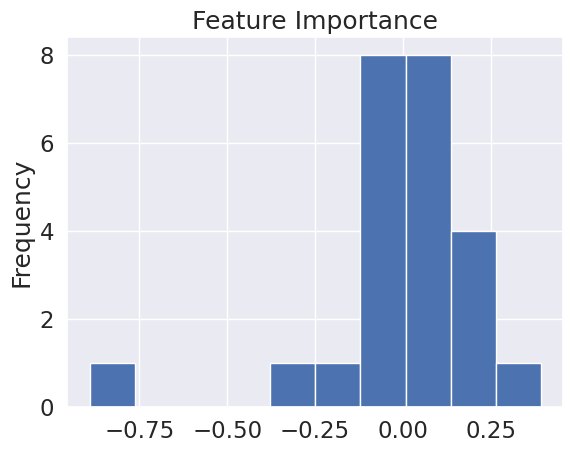

In [49]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="hist",legend=False,title="Feature Importance")

<Axes: title={'center': 'Feature Importance'}>

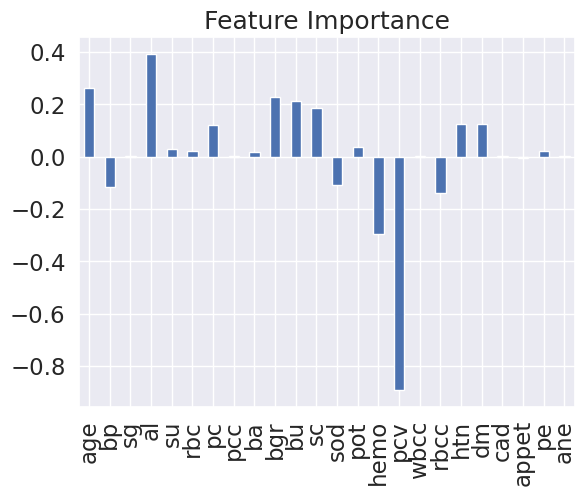

In [50]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

## Saving model

In [51]:
import pickle

# Now with the help of pickle model we will be saving the trained model
saved_model = pickle.dumps(logreg)

# Load the pickled model
logreg_from_pickle = pickle.loads(saved_model)

# Now here we will load the model
logreg_from_pickle.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

### Another method

In [52]:
# Now with open function we will save the kidney disease predcition model in write mode
with open('kidney_disease_prediction.pkl', 'wb') as files:
    pickle.dump(logreg, files)

In [53]:
 # load saved model
with open('kidney_disease_prediction.pkl' , 'rb') as f:
    model = pickle.load(f)

In [54]:
# check prediction
# lr.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]) # similar

logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [55]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1


In [56]:
# putting datapoints in the model it will either return 0 or 1 i.e. person having chronic kideny disease or not
logreg.predict([[48,80,1.02,1,0,1,0,1,1,2,0,0,1,1,0,1,1,2,0,0,1,0,1,2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## Summary

In this article I have used various machine learning model to classify that weather the patient will have chronic kidney problems or not based on the data of patients.

KNN required class balancing, scaling, and model tuning to perform with 100% accuracy, while Logistic Regression was 100% accurate without tuning (note: still had to stratify the train test split).

Logisitic regression in my case seems to be a better model as it provide 100% accuracy yet it used a least resources as it even does'nt required the model tuning.